In [1]:
documents = ["I like this movie, it's it's it's funny.", 
             'I hate this movie.', 
             'This was awesome! I like it.', 
             'Nice one. I love it.']

In [2]:
import warnings
warnings.filterwarnings("ignore")

## CountVectorizer

In [3]:
CountVectorizer?

Object `CountVectorizer` not found.


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

count_vectorizer = CountVectorizer(ngram_range=(2, 5), 
                                   analyzer='char',  # not words, bur symbols
                                   binary=False, 
                                   tokenizer=str.split)

# Создаем the Bag-of-Words модель
bag_of_words = count_vectorizer.fit_transform(documents)

# Отобразим Bag-of-Words модель как DataFrame
feature_names = count_vectorizer.get_feature_names()
pd.DataFrame(bag_of_words.toarray(), columns = feature_names)

,a,aw,awe,awes,f,fu,fun,funn,h,ha,...,vie.,wa,was,was,was a,we,wes,weso,wesom,y.
0,0,0,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
len(feature_names), feature_names[:10]

(258,
 [' a', ' aw', ' awe', ' awes', ' f', ' fu', ' fun', ' funn', ' h', ' ha'])

In [6]:
from nltk.util import ngrams

text = "I like this movie, it's funny. I hate this movie. This was awesome! I like it. Nice one. I love it."
tokenized = text.split()
bigrams = ngrams(tokenized, (2))
list(bigrams)

[('I', 'like'),
 ('like', 'this'),
 ('this', 'movie,'),
 ('movie,', "it's"),
 ("it's", 'funny.'),
 ('funny.', 'I'),
 ('I', 'hate'),
 ('hate', 'this'),
 ('this', 'movie.'),
 ('movie.', 'This'),
 ('This', 'was'),
 ('was', 'awesome!'),
 ('awesome!', 'I'),
 ('I', 'like'),
 ('like', 'it.'),
 ('it.', 'Nice'),
 ('Nice', 'one.'),
 ('one.', 'I'),
 ('I', 'love'),
 ('love', 'it.')]

## TfidfVectorizer

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

document = ["I like this movie, it's funny funny.", 'I hate this movie.', 'This was awesome! I like it.', 'Nice one. I love it.']
tfidf_vectorizer = TfidfVectorizer()
values = tfidf_vectorizer.fit_transform(document)

# Show the Model as a pandas DataFrame
feature_names = tfidf_vectorizer.get_feature_names()
pd.DataFrame(values.toarray(), columns = feature_names)

,awesome,funny,hate,it,like,love,movie,nice,one,this,was
0,0.000000,0.812578,0.000000,0.259329,0.320323,0.000000,0.320323,0.000000,0.000000,0.259329,0.000000
1,0.000000,0.000000,0.702035,0.000000,0.000000,0.000000,0.553492,0.000000,0.000000,0.448100,0.000000
2,0.539445,0.000000,0.000000,0.344321,0.425305,0.000000,0.000000,0.000000,0.000000,0.344321,0.539445
3,0.000000,0.000000,0.000000,0.345783,0.000000,0.541736,0.000000,0.541736,0.541736,0.000000,0.000000


In [8]:
tfidf_vectorizer.idf_

array([1.91629073, 1.91629073, 1.91629073, 1.22314355, 1.51082562,
       1.91629073, 1.51082562, 1.91629073, 1.91629073, 1.22314355,
       1.91629073])

## HashingVectorizer

In [9]:
HashingVectorizer?

Object `HashingVectorizer` not found.


In [10]:
from sklearn.feature_extraction.text import HashingVectorizer

document = ["I like this movie, it's funny.", 'I hate this movie.', 'This was awesome! I like it.', 'Nice one. I love it.']
vectorizer = HashingVectorizer(n_features=4,)
values = vectorizer.fit_transform(document)
print(values.shape)
print(values.toarray())

(4, 4)
[[ 0.57735027  0.          0.57735027 -0.57735027]
 [ 0.          0.          0.         -1.        ]
 [ 0.          0.4472136   0.89442719  0.        ]
 [-0.70710678  0.          0.70710678  0.        ]]


In [11]:
# Загружаем данные
data = open('corpus', encoding='utf-8').read()
labels, texts = [], []
for i, line in enumerate(data.split("\n")):
    content = line.split()
    labels.append(content[0])
    texts.append(" ".join(content[1:]))

# создаем df
trainDF = pd.DataFrame()
trainDF['text'] = texts
trainDF['label'] = labels
trainDF.head(5)

,text,label
0,Stuning even for the non-gamer: This sound tra...,__label__2
1,The best soundtrack ever to anything.: I'm rea...,__label__2
2,Amazing!: This soundtrack is my favorite music...,__label__2
3,Excellent Soundtrack: I truly like this soundt...,__label__2
4,"Remember, Pull Your Jaw Off The Floor After He...",__label__2


In [12]:
trainDF['label'].value_counts(normalize=True)

__label__1    0.5097
__label__2    0.4903
Name: label, dtype: float64

In [13]:
from sklearn import model_selection, preprocessing, linear_model


train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['text'], trainDF['label'])

# labelEncode целевую переменную
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.transform(valid_y)

In [14]:
count_vect = CountVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             max_features=200)
count_vect.fit(trainDF['text'])

xtrain_count = count_vect.transform(train_x)
xvalid_count = count_vect.transform(valid_x)

classifier = linear_model.LogisticRegression()
classifier.fit(xtrain_count, train_y)
predictions = classifier.predict(xvalid_count)
# predictions

In [15]:
xtrain_count.shape

(7500, 200)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(valid_y, predictions)

0.7732

In [18]:
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=200)
tfidf_vect.fit(trainDF['text'])

xtrain_hash = tfidf_vect.transform(train_x)
xvalid_hash = tfidf_vect.transform(valid_x)

classifier = linear_model.LogisticRegression()
classifier.fit(xtrain_hash, train_y)
predictions = classifier.predict(xvalid_hash)

In [19]:
xtrain_hash.shape

(7500, 200)

In [20]:
accuracy_score(valid_y, predictions)

0.7776

In [21]:
vct = HashingVectorizer(analyzer='word', token_pattern=r'\w{1,}', n_features=200)
vct.fit(trainDF['text'])

xtrain_hash = vct.transform(train_x)
xvalid_hash = vct.transform(valid_x)

classifier = linear_model.LogisticRegression()
classifier.fit(xtrain_hash, train_y)
predictions = classifier.predict(xvalid_hash)
# predictions

In [22]:
xtrain_hash.shape

(7500, 200)

In [23]:
accuracy_score(valid_y, predictions)

0.7184

# классификация твитов по тональности

In [24]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [25]:
# считываем данные и заполняем общий датасет
positive = pd.read_csv('positive.csv', sep=';', usecols=[3], names=['text'])
positive['label'] = ['positive'] * len(positive)
negative = pd.read_csv('negative.csv', sep=';', usecols=[3], names=['text'])
negative['label'] = ['negative'] * len(negative)
df = positive.append(negative)

In [26]:
df.tail()

,text,label
111918,Но не каждый хочет что то исправлять:( http://...,negative
111919,скучаю так :-( только @taaannyaaa вправляет мо...,negative
111920,"Вот и в школу, в говно это идти уже надо(",negative
111921,"RT @_Them__: @LisaBeroud Тауриэль, не грусти :...",negative
111922,Такси везет меня на работу. Раздумываю приплат...,negative


In [27]:
x_train, x_test, y_train, y_test = train_test_split(df.text, df.label)

In [28]:
from sklearn.linear_model import LogisticRegression # можно заменить на любимый классификатор
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
vec = CountVectorizer(ngram_range=(1, 1), max_features=200)
bow = vec.fit_transform(x_train) # bow -- bag of words (мешок слов)

In [30]:
list(vec.vocabulary_.items())[:10]

[('то', 168),
 ('что', 192),
 ('не', 104),
 ('день', 44),
 ('без', 7),
 ('это', 196),
 ('спасибо', 155),
 ('на', 97),
 ('от', 125),
 ('тебя', 166)]

In [31]:
pd.DataFrame(bow.toarray(), columns=vec.get_feature_names()).head(1)

,10,co,dd,http,rt,ахах,ахаха,без,блин,бля,...,чем,через,что,чтобы,школу,эти,это,этого,этом,этот
0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0


In [32]:
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)

LogisticRegression(random_state=42)

In [33]:
from sklearn.metrics import classification_report

In [34]:
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.63      0.65      0.64     27415
    positive       0.66      0.65      0.66     29294

    accuracy                           0.65     56709
   macro avg       0.65      0.65      0.65     56709
weighted avg       0.65      0.65      0.65     56709



In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
vec = TfidfVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.73      0.77      0.75     26632
    positive       0.79      0.75      0.77     30077

    accuracy                           0.76     56709
   macro avg       0.76      0.76      0.76     56709
weighted avg       0.76      0.76      0.76     56709



# Pointwise Mutual Information

In [38]:
import nltk
from nltk import collocations 
nltk.download('genesis')

[nltk_data] Downloading package genesis to
[nltk_data]     C:\Users\fross\AppData\Roaming\nltk_data...
[nltk_data]   Package genesis is already up-to-date!


True

In [39]:
# print(type(nltk.corpus.genesis.words('english-web.txt')))  # ???

bigram_measures = collocations.BigramAssocMeasures()
# bigram_finder.apply_freq_filter(5)

bigram_finder = collocations.BigramCollocationFinder.from_documents([nltk.word_tokenize(_) for _ in x_train])

print(bigram_finder.nbest(bigram_measures.pmi, 100))

[('+1239', '728'), ('+375447167151', 'звоги'), ('+Никита', '=полностью'), ('+СОННО', '+НЕ'), ('+живіт', 'болить.ну'), ('+погода', 'крутая='), (',4', 'запирайте'), (',Дела', 'рез'), ('-/////', 'прбрм-прбрм'), ('-10,11', 'болсо'), ('-165', '-СИНИЙ'), ('-53', 'dBm'), ('-700', 'рублей.-А'), ('-800', 'нахууй'), ('-АХАХАХАХ', 'ЮБКУ'), ('-Айгуль', 'Маратовна'), ('-Аха', 'спетросянил'), ('-ВАХАХАХА', 'СТИПЕНДИЯ'), ('-ВСЕМ', 'СПОКОЙНЫХ'), ('-Вам', 'завернуть'), ('-Весело', 'кншн:3'), ('-ГНИДОТА', '-Над'), ('-Дирол', 'Сенсес'), ('-ЖАРЕНЫЙ', 'КАРТОФЕЛЬ'), ('-ЖРАТЬ', 'БАРАНКИ'), ('-ЗАШЛА', 'ОДЕЛА'), ('-Защитано', '-ес'), ('-Зелено-карие', '-Киллджой'), ('-Керем', 'севгили'), ('-Киллджой', '-Котик'), ('-Корнейчук', 'затроллила'), ('-Маладец', '-Лол'), ('-НА', 'РЕАЛЬНЫХ'), ('-Настя', 'Пармсон'), ('-ОЗВУЧИВАТЕЛЬ', 'МУЛЬТИКОВ'), ('-ОНИ', 'СТОЯТ'), ('-Олесь', '-Пошёл'), ('-Песня', 'грусная='), ('-Под', 'Киевом'), ('-Поэзия', 'заключает'), ('-ПриФетиГг', 'СолНыСко='), ('-СИНИЙ', '-БЕЛЫЕ'), ('-СУКА', 'ЛУ

In [40]:
print(bigram_finder.nbest(bigram_measures.likelihood_ratio, 100))

[('(', '('), ('RT', '@'), (')', ')'), ('http', ':'), ('!', '!'), (':', 'D'), ('у', 'меня'), (':', '('), (',', 'а'), (',', 'что'), (',', 'но'), (')', 'http'), ('*', '*'), ('(', ','), (':', ')'), ('у', 'нас'), (',', '('), (':', '-'), ('не', 'могу'), (',', ')'), ('?', '?'), (')', ','), (',', ':'), ('@', '('), (',', ','), ('(', ':'), (':', ','), ('@', ')'), ('&', 'lt'), ('со', 'мной'), ('@', ','), ('@', ':'), ('(', '@'), (':', ':'), ('gt', ';'), (':', '*'), ('новый', 'год'), ('не', 'знаю'), (';', ')'), (')', ':'), (',', '@'), ('@', '@'), ('потому', 'что'), ('а', 'я'), (',', 'когда'), ('lt', ';'), ('У', 'меня'), ('сих', 'пор'), ('&', 'gt'), (';', '('), ('у', 'тебя'), ('все', 'равно'), ('в', 'школу'), ('с', 'тобой'), (',', 'как'), ('&', 'amp'), ('ничего', 'не'), ('(', 'http'), ('Доброе', 'утро'), (')', '@'), (',', 'я'), ('Как', 'же'), ('-', ')'), ('я', 'не'), (':', 'DD'), ('не', '('), ('--', '--'), ('самом', 'деле'), ('amp', ';'), ('не', ')'), ('до', 'сих'), ('D', 'http'), ('как', 'же'), ('(

In [41]:
from nltk.corpus import stopwords
# nltk.download('stopwords')
print(stopwords.words('russian')[:10])

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']


In [42]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
noise = stopwords.words('russian') + list(punctuation)

In [44]:
# tokenized_words = [nltk.word_tokenize(_) for _ in x_train]
# tokenized_words = [_ for _ in tokenized_words if _ not in noise]

In [45]:
# print(type(nltk.corpus.genesis.words('english-web.txt')))  # ???

bigram_measures = collocations.BigramAssocMeasures()
# bigram_finder.apply_freq_filter(5)

tokenized_sentences = [nltk.word_tokenize(_) for _ in x_train]
tokenized_sentences = [[_ for _ in sentence if _ not in noise] for sentence in tokenized_sentences]

bigram_finder = collocations.BigramCollocationFinder.from_documents(tokenized_sentences)
# bigrams = bigram_finder.nbest(bigram_measures.pmi, 100)

print(bigram_finder.nbest(bigram_measures.pmi, 100))

[('+++Лучше', 'тооожее'), ('+1239', '728'), ('+375447167151', 'звоги'), ('+5тыс', 'степухе'), ('+Никита', '=полностью'), ('+СОННО', '+НЕ'), ('+живіт', 'болить.ну'), ('+погода', 'крутая='), (',4', 'запирайте'), (',7', 'деньгиденьгиденьги'), (',Дела', 'рез'), (',Только', 'гордая'), (',Хъм', 'БОЛЕВъШИЙ'), (',Ю', 'Ю.Ю.ю.ю'), (',бля', ',алкоголь'), (',если', 'полутемном'), (',хотела', 'экстрасенсом'), ('-/////', 'прбрм-прбрм'), ('-10,11', 'болсо'), ('-165', '-СИНИЙ'), ('-31', 'Подъемники'), ('-364/+1', '-51/+1'), ('-53', 'dBm'), ('-700', 'рублей.-А'), ('-800', 'нахууй'), ('-R', '/dev/dsp'), ('-http', '//t.co/Wx3Wd47riG'), ('-https', '//t.co/5SL0tQq5KX'), ('-journal', 'DAEMON_OPTS'), ('-АГА', 'ПОПАЛАСЬ'), ('-АХАХАХАХ', 'ЮБКУ'), ('-АХАХХА', 'ИЛЬЯС'), ('-Абитуриенты', 'Странно.Дерьмо'), ('-Айгуль', 'Маратовна'), ('-Алиночка', 'спонсор.И'), ('-Аха', 'спетросянил'), ('-Богословська', 'політична'), ('-Братан', 'пузооо'), ('-ВАХАХАХА', 'СТИПЕНДИЯ'), ('-ВСЕМ', 'СПОКОЙНЫХ'), ('-Вам', 'завернуть'), (

In [46]:
print(bigram_finder.nbest(bigram_measures.likelihood_ratio, 100))

[('новый', 'год'), ('сих', 'пор'), ('Доброе', 'утро'), ('самом', 'деле'), ('--', '--'), ('lt', '3'), ('Новый', 'Год'), ('amp', 'gt'), ('D', 'http'), ('Новый', 'год'), ('целый', 'день'), ('последнее', 'время'), ('друг', 'друга'), ('весь', 'день'), ('днем', 'рождения'), ('каждый', 'день'), ('sm', 'amp'), ('офигенны', 'ракал'), ('доброе', 'утро'), ('спокойной', 'ночи'), ('новогоднего', 'настроения'), ('позитива', 'бегал'), ('танцы', 'офигенны'), ('бегал', 'идиот'), ('9', '9'), ('всё', 'равно'), ('au', 'amp'), ('идиот', 'целый'), ('Царевич', 'Серый'), ('Днем', 'Рождения'), ('Серый', 'Волк'), ('One', 'Direction'), ('Иван', 'Царевич'), ('нового', 'года'), ('A', 'http'), ('To', 'Mars'), ('gt', 'lt'), ('Seconds', 'To'), ('сладких', 'снов'), ('На', 'улице'), ('RT', 'TukvaSociopat'), ('ракал', 'очень'), ('моей', 'жизни'), ('30', 'Seconds'), ('ненавидит', 'пробки'), ('2', 'часа'), ('євромайдан', 'http'), ('Офигенный', 'день'), ('пробки', 'ретвит'), ('новогоднее', 'настроение'), ('Я', 'хочу'), ('1

In [47]:
vec = CountVectorizer(ngram_range=(1, 1), tokenizer=nltk.word_tokenize, stop_words=noise)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       0.80      0.76      0.78     29289
    positive       0.76      0.80      0.78     27420

    accuracy                           0.78     56709
   macro avg       0.78      0.78      0.78     56709
weighted avg       0.78      0.78      0.78     56709



# Lemmatization

## pymystem3

In [48]:
# !pip install pymystem3

In [49]:
from pymystem3 import Mystem
mystem_analyzer = Mystem()

In [50]:
example = 'но не каждый хотеть что-то исправлять :(\n'

### just lemmatizing

In [51]:
print(mystem_analyzer.lemmatize(example))

['но', ' ', 'не', ' ', 'каждый', ' ', 'хотеть', ' ', 'что-то', ' ', 'исправлять', ' :(\n']


### getting grammatical information

In [52]:
mystem_analyzer.analyze(example)

[{'analysis': [{'lex': 'но', 'wt': 0.9998906299, 'gr': 'CONJ='}],
  'text': 'но'},
 {'text': ' '},
 {'analysis': [{'lex': 'не', 'wt': 1, 'gr': 'PART='}], 'text': 'не'},
 {'text': ' '},
 {'analysis': [{'lex': 'каждый',
    'wt': 0.9985975799,
    'gr': 'APRO=(вин,ед,муж,неод|им,ед,муж)'}],
  'text': 'каждый'},
 {'text': ' '},
 {'analysis': [{'lex': 'хотеть', 'wt': 1, 'gr': 'V,несов,пе=инф'}],
  'text': 'хотеть'},
 {'text': ' '},
 {'analysis': [{'lex': 'что-то', 'wt': 1, 'gr': 'SPRO,ед,сред,неод=(вин|им)'}],
  'text': 'что-то'},
 {'text': ' '},
 {'analysis': [{'lex': 'исправлять', 'wt': 1, 'gr': 'V,пе=инф,несов'}],
  'text': 'исправлять'},
 {'text': ' :(\n'}]

## pymorphy2

In [55]:
from pymorphy2 import MorphAnalyzer
pymorphy2_analyzer = MorphAnalyzer()

In [74]:
example = 'но не каждый хотел что-то исправлять :(\n'
example = list(example.split())
example

['но', 'не', 'каждый', 'хотел', 'что-то', 'исправлять', ':(']

#### pymorphy2 doesn't work with sentences, only with words

In [76]:
ana = pymorphy2_analyzer.parse(example[3])
ana

[Parse(word='хотел', tag=OpencorporaTag('VERB,impf,tran masc,sing,past,indc'), normal_form='хотеть', score=1.0, methods_stack=((DictionaryAnalyzer(), 'хотел', 3136, 7),))]

In [77]:
ana[0].normal_form

'хотеть'

## razdel

In [ ]:
# !pip install razdel

In [78]:
from razdel import tokenize

tokens = list(tokenize('Кружка-термос на 0.5л (50/64 см³, 516;...)'))
tokens

[Substring(0, 13, 'Кружка-термос'),
 Substring(14, 16, 'на'),
 Substring(17, 20, '0.5'),
 Substring(20, 21, 'л'),
 Substring(22, 23, '('),
 Substring(23, 28, '50/64'),
 Substring(29, 32, 'см³'),
 Substring(32, 33, ','),
 Substring(34, 37, '516'),
 Substring(37, 38, ';'),
 Substring(38, 41, '...'),
 Substring(41, 42, ')')]

In [79]:
[_.text for _ in tokens]

['Кружка-термос',
 'на',
 '0.5',
 'л',
 '(',
 '50/64',
 'см³',
 ',',
 '516',
 ';',
 '...',
 ')']

## natasha

In [81]:
# !pip install natasha

In [82]:
from natasha import Doc, MorphVocab, Segmenter, NewsEmbedding, NewsMorphTagger

segmenter = Segmenter()
morph_vocab = MorphVocab()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)

In [83]:
def natasha_lemmatize(text):
    doc = Doc(text)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)
    for token in doc.tokens:
        token.lemmatize(morph_vocab)
    return {_.text: _.lemma for _ in doc.tokens}

In [92]:
text = 'Президент США Джо Байден намерен участвовать в выборах на пост главы государства в 2024 году, но окончательного решения по этому поводу еще не принял. Об этом он заявил в интервью телеканалу MSNBC.'

natasha_lemmatize(text)

{'Президент': 'президент',
 'США': 'сша',
 'Джо': 'джо',
 'Байден': 'байден',
 'намерен': 'намеренный',
 'участвовать': 'участвовать',
 'в': 'в',
 'выборах': 'выбор',
 'на': 'на',
 'пост': 'пост',
 'главы': 'глава',
 'государства': 'государство',
 '2024': '2024',
 'году': 'год',
 ',': ',',
 'но': 'но',
 'окончательного': 'окончательный',
 'решения': 'решение',
 'по': 'по',
 'этому': 'этот',
 'поводу': 'повод',
 'еще': 'еще',
 'не': 'не',
 'принял': 'принять',
 '.': '.',
 'Об': 'о',
 'этом': 'это',
 'он': 'он',
 'заявил': 'заявить',
 'интервью': 'интервью',
 'телеканалу': 'телеканал',
 'MSNBC': 'msnbc'}

## identification of homonyms

In [93]:
homonym1 = 'За время обучения я прослушал больше сорока курсов.'
homonym2 = 'Сорока своровала блестящее украшение со стола.'

In [94]:
mystem_analyzer = Mystem() # инициализирую объект с дефолтными параметрами

print(mystem_analyzer.analyze(homonym1)[-5])
print(mystem_analyzer.analyze(homonym2)[0])

{'analysis': [{'lex': 'сорок', 'wt': 0.8710292664, 'gr': 'NUM=(пр|дат|род|твор)'}], 'text': 'сорока'}
{'analysis': [{'lex': 'сорока', 'wt': 0.1210970041, 'gr': 'S,жен,од=им,ед'}], 'text': 'Сорока'}


in homonym1 'сорока' was rightfully identified as a number

in homonym2 'Сорока' was also rightfully identified as a subject

#### so, pymystem3 made it very well!!!

In [95]:
print(natasha_lemmatize(homonym1))

{'За': 'за', 'время': 'время', 'обучения': 'обучение', 'я': 'я', 'прослушал': 'прослушать', 'больше': 'большой', 'сорока': 'сорок', 'курсов': 'курс', '.': '.'}


In [96]:
print(natasha_lemmatize(homonym2))

{'Сорока': 'сорок', 'своровала': 'своровать', 'блестящее': 'блестящий', 'украшение': 'украшение', 'со': 'с', 'стола': 'стол', '.': '.'}


#### natasha didn't do it quite well 

## Словарь, закон Ципфа и закон Хипса

Закон Ципфа -- эмпирическая закономерность: если все слова корпуса текста упорядочить по убыванию частоты их использования, то частота n-го слова в таком списке окажется приблизительно обратно пропорциональной его порядковому номеру n. Иными словами, частотность слов убывает очень быстро.

In [97]:
from collections import Counter

In [102]:
corpus = [token for tweet in df.text for token in nltk.word_tokenize(tweet) if token not in punctuation]
print(len(corpus))
corpus[:10]

2870536


['first_timee', 'хоть', 'я', 'и', 'школота', 'но', 'поверь', 'у', 'нас', 'то']

In [103]:
freq_dict = Counter(corpus)
freq_dict_sorted= sorted(freq_dict.items(), key=lambda x: -x[1])
list(freq_dict_sorted)[:10]

[('не', 69472),
 ('и', 55166),
 ('в', 52902),
 ('я', 52818),
 ('RT', 38070),
 ('на', 35759),
 ('http', 32998),
 ('что', 31541),
 ('с', 27217),
 ('а', 26860)]

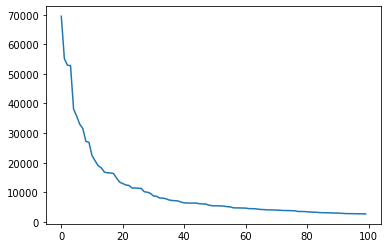

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline
first_100_freqs = [freq for word, freq in freq_dict_sorted[:100]]
plt.plot(first_100_freqs)
plt.show()

Закон Хипса -- обратная сторона закона Ципфа. Он описывает, что чем больше корпус, тем меньше новых слов добавляется с добавлением новых текстов. В какой-то момент корпус насыщается.

## О важности эксплоративного анализа

Но иногда пунктуация бывает и не шумом -- главное отталкиваться от задачи. Что будет если вообще не убирать пунктуацию?

In [106]:
vec = TfidfVectorizer(ngram_range=(1, 1), tokenizer=nltk.word_tokenize)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00     27883
    positive       1.00      1.00      1.00     28826

    accuracy                           1.00     56709
   macro avg       1.00      1.00      1.00     56709
weighted avg       1.00      1.00      1.00     56709



Шок! Стоило оставить пунктуацию -- и все метрики равны 1. Как это получилось? Среди неё были очень значимые токены (как вы думаете, какие?). Найдите фичи с самыми большими коэффициэнтами: